### Imports Necesarios

In [87]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import matplotlib.pyplot as plt
import seaborn as sns

### Introducción

### Importamos el Dataset y lo pasamos a Dataframe

In [105]:
# Install dependencies as needed:
#!pip install kagglehub[pandas-datasets]
# Set the path to the file you'd like to load
file_path = "Datos.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "fjcob1/idealista-madrid",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

display("Primeros 5 registros:", df.head())

# Encuentra el valor máximo en la columna 'metros' y obtiene el registro completo
registro_maximo = df.loc[df["metros"] == 11]
display(registro_maximo)

'Primeros 5 registros:'

,provincia,zona,titulo,PrecioActual,PrecioAnterior,metros,habitaciones,ascensor,localizacion,planta,baños,tags,descripcion,Enlace
0,madrid,ciudad-lineal,"Piso en calle de San Marcelo, 22, Ventas, Madrid",355000,0,69,2.0,S,EXTERIOR,5ª,1,"VIVIENDA,LUMINOSO,VISTAS,REFORMADA,PORTERO,EXT...",Particular Vende vivienda totalmente reformada...,https://www.idealista.com/inmueble/106956987/
1,madrid,carabanchel,"Piso en calle Cabo Nicolás Mur, San Isidro, Ma...",149000,159000,91,3.0,N,EXTERIOR,1ª,0,"PISO,EXCLUSIVA,INMOBILIARIA,OPORTUNIDAD",Inmobiliarias Encuentro vende en exclusiva la ...,https://www.idealista.com/inmueble/106906044/
2,madrid,centro,"Piso en calle de Rodas, Lavapiés-Embajadores, ...",195000,0,36,1.0,S,NaN,2ª,0,"EXCLUSIVA,ESTUDIO",ESTUDIO EN PLENO CENTRO DE MADRIDSarago Servic...,https://www.idealista.com/inmueble/107306175/
3,madrid,usera,"Piso en calle de Ferroviarios, Almendrales, Ma...",195000,0,58,1.0,S,INTERIOR,BAJO,0,"VIVIENDA,HOGAR,FUNCIONAL","Esta acogedora vivienda, ubicada en una planta...",https://www.idealista.com/inmueble/106325171/
4,madrid,tetuan,"Dúplex en Bellas Vistas, Madrid",715000,750000,140,3.0,S,EXTERIOR,2ª,0,"TERRAZA,EXCLUSIVA,MODERNO","Maravilloso ATICO de reciente construcción, co...",https://www.idealista.com/inmueble/106627265/


,provincia,zona,titulo,PrecioActual,PrecioAnterior,metros,habitaciones,ascensor,localizacion,planta,baños,tags,descripcion,Enlace
407,madrid,centro,"Ático en calle de Juanelo, Lavapiés-Embajadore...",125000,0,11,NaN,N,INTERIOR,4ª,1,"OPORTUNIDAD,ESTUDIO",Estudio ubicado en el vibrante barrio de Lavap...,https://www.idealista.com/inmueble/104305109/


### Introducción de los Datos
* provincia: Provincia
* zona: zona
* título: Breve descripción de la oferta.
* PrecioActual: Precio de venta actual.
* PrecioAnterior: Precio de la oferta anterior.
* metros: metros cuadrados.
* habitaciones: número de habitaciones.
* ascensor: si se indica que tenga o no ascensor.
* localización: Interior, exterior,…
* planta: número de planta.
* baños: número de baños.
* tags: etiquetas relevantes dependiendo de lo indicado en la oferta.
* descripción: descripción de la oferta de venta.
* Enlace: enlace a la oferta.

### Vemos el tipo de dato de los campos

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11826 entries, 0 to 11825
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   provincia       11826 non-null  object 
 1   zona            11826 non-null  object 
 2   titulo          11826 non-null  object 
 3   PrecioActual    11826 non-null  int64  
 4   PrecioAnterior  11826 non-null  int64  
 5   metros          11826 non-null  int64  
 6   habitaciones    11460 non-null  float64
 7   ascensor        11033 non-null  object 
 8   localizacion    10730 non-null  object 
 9   planta          10601 non-null  object 
 10  baños           11826 non-null  int64  
 11  tags            11664 non-null  object 
 12  descripcion     11761 non-null  object 
 13  Enlace          11826 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 1.3+ MB


### Vemos cuantos valores únicos hay de la columna provincia para asegurarnos antes de borrarla

In [90]:
df['provincia'].unique()

array(['madrid'], dtype=object)

### Vemos cuantos valores "0" hay de la columna PrecioAnterior para asegurarnos antes de borrarla

In [91]:
total_registros = len(df)

valores_cero = (df['PrecioAnterior'] == 0).sum()

print(f"Total de registros: {total_registros}")
print(f"Valores iguales a 0 en 'PrecioAnterior': {valores_cero}")

Total de registros: 11826
Valores iguales a 0 en 'PrecioAnterior': 10713


### Nuestra variable objetivo va a ser el PrecioActual de la vivienda y de momento vamos a eliminar las columnas que no son relevantes para nuetro modelo:
* provincia
* PrecioAnterior
* Enlace (no aporta nada)

In [92]:
try:
    df.drop(columns=['provincia', 'PrecioAnterior', 'Enlace'], inplace=True)
    print("Columnas eliminadas correctamente.")
except KeyError as e:
    print(f"No se pudieron eliminar algunas columnas porque no existen(ya se han eliminado): {e}")
display(df.head())

Columnas eliminadas correctamente.


,zona,titulo,PrecioActual,metros,habitaciones,ascensor,localizacion,planta,baños,tags,descripcion
0,ciudad-lineal,"Piso en calle de San Marcelo, 22, Ventas, Madrid",355000,69,2.0,S,EXTERIOR,5ª,1,"VIVIENDA,LUMINOSO,VISTAS,REFORMADA,PORTERO,EXT...",Particular Vende vivienda totalmente reformada...
1,carabanchel,"Piso en calle Cabo Nicolás Mur, San Isidro, Ma...",149000,91,3.0,N,EXTERIOR,1ª,0,"PISO,EXCLUSIVA,INMOBILIARIA,OPORTUNIDAD",Inmobiliarias Encuentro vende en exclusiva la ...
2,centro,"Piso en calle de Rodas, Lavapiés-Embajadores, ...",195000,36,1.0,S,NaN,2ª,0,"EXCLUSIVA,ESTUDIO",ESTUDIO EN PLENO CENTRO DE MADRIDSarago Servic...
3,usera,"Piso en calle de Ferroviarios, Almendrales, Ma...",195000,58,1.0,S,INTERIOR,BAJO,0,"VIVIENDA,HOGAR,FUNCIONAL","Esta acogedora vivienda, ubicada en una planta..."
4,tetuan,"Dúplex en Bellas Vistas, Madrid",715000,140,3.0,S,EXTERIOR,2ª,0,"TERRAZA,EXCLUSIVA,MODERNO","Maravilloso ATICO de reciente construcción, co..."


## 1. Preparación por columnas de nuestro dataset

In [93]:
# Vamos a poner el PrecioActual como la primera columna
df = df[['PrecioActual'] + [col for col in df.columns if col != 'PrecioActual']]
display(df.head())

,PrecioActual,zona,titulo,metros,habitaciones,ascensor,localizacion,planta,baños,tags,descripcion
0,355000,ciudad-lineal,"Piso en calle de San Marcelo, 22, Ventas, Madrid",69,2.0,S,EXTERIOR,5ª,1,"VIVIENDA,LUMINOSO,VISTAS,REFORMADA,PORTERO,EXT...",Particular Vende vivienda totalmente reformada...
1,149000,carabanchel,"Piso en calle Cabo Nicolás Mur, San Isidro, Ma...",91,3.0,N,EXTERIOR,1ª,0,"PISO,EXCLUSIVA,INMOBILIARIA,OPORTUNIDAD",Inmobiliarias Encuentro vende en exclusiva la ...
2,195000,centro,"Piso en calle de Rodas, Lavapiés-Embajadores, ...",36,1.0,S,NaN,2ª,0,"EXCLUSIVA,ESTUDIO",ESTUDIO EN PLENO CENTRO DE MADRIDSarago Servic...
3,195000,usera,"Piso en calle de Ferroviarios, Almendrales, Ma...",58,1.0,S,INTERIOR,BAJO,0,"VIVIENDA,HOGAR,FUNCIONAL","Esta acogedora vivienda, ubicada en una planta..."
4,715000,tetuan,"Dúplex en Bellas Vistas, Madrid",140,3.0,S,EXTERIOR,2ª,0,"TERRAZA,EXCLUSIVA,MODERNO","Maravilloso ATICO de reciente construcción, co..."


## *Columna zona*

In [94]:
# Vemos si hay valores nulos
print("Valores nulos", df["zona"].isnull().sum())

# Vemos cuantos valores únicos hay en esta columna por si podemos agrupar por grupos para representar enfrentandolo a PrecioActual
df["zona"].unique()

Valores nulos 0


array(['ciudad-lineal', 'carabanchel', 'centro', 'usera', 'tetuan',
       'arganzuela', 'barrio-de-salamanca', 'puente-de-vallecas',
       'moncloa', 'chamberi', 'chamartin', 'villaverde', 'fuencarral',
       'retiro', 'moratalaz', 'hortaleza', 'san-blas', 'latina',
       'barajas', 'villa-de-vallecas', 'vicalvaro'], dtype=object)

### zona enfrentado al PrecioActual

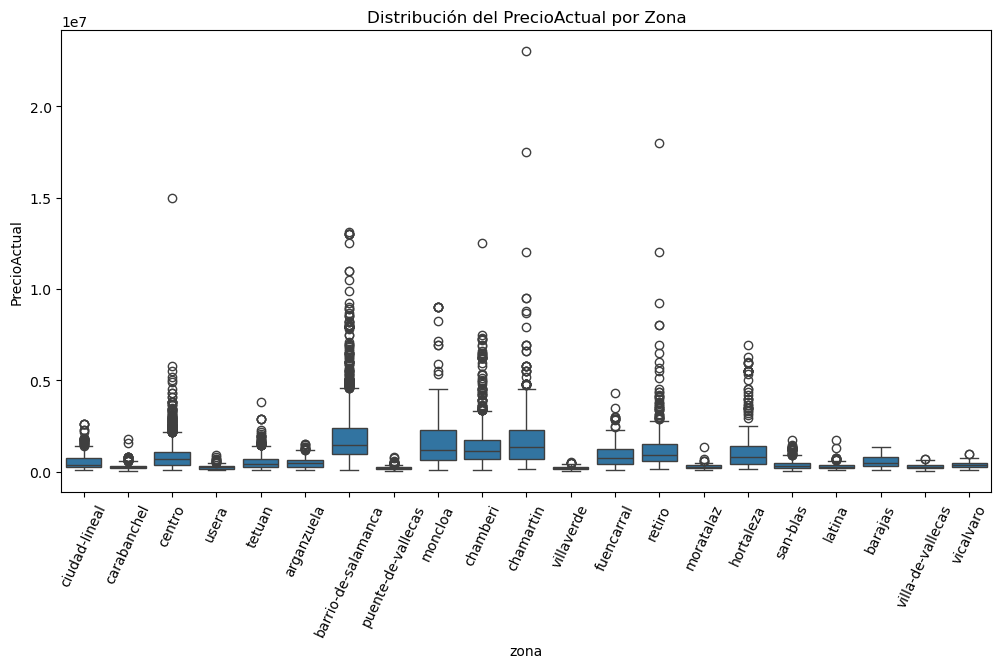

In [95]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="zona", y="PrecioActual", data=df)
plt.xticks(rotation=65)  # Rotar etiquetas para mejor lectura
plt.title("Distribución del PrecioActual por Zona")
plt.show()

### media de precio de vivienda por zonas

In [96]:
media_precio_por_zona = df.groupby("zona")["PrecioActual"].mean().sort_values(ascending=False)

# Formatear los valores sin notación científica y con separador de miles
media_precio_por_zona = media_precio_por_zona.apply(lambda x: f"{x:.3f}")

display(media_precio_por_zona)

zona
barrio-de-salamanca    1966802.046
chamartin              1767126.296
moncloa                1620871.172
chamberi               1498335.730
retiro                 1310153.789
hortaleza              1190754.570
fuencarral              892204.092
centro                  862305.902
tetuan                  577428.998
barajas                 555625.660
ciudad-lineal           542408.108
arganzuela              484212.350
san-blas                401028.385
vicalvaro               356815.922
latina                  299185.233
villa-de-vallecas       298188.288
moratalaz               296772.155
carabanchel             273038.078
usera                   252341.970
villaverde              198630.583
puente-de-vallecas      191280.369
Name: PrecioActual, dtype: object

## *Columna titulo*
### Vamos a borrarla porque no va a influenciar en el entrenamiento del modelo

In [97]:
try:
    df.drop(columns=['titulo'], inplace=True)
    print("Columna titulo eliminada correctamente.")
except KeyError as e:
    print(f"No se pudo eliminar la columna titulo o ya ha sido eliminada): {e}")
display(df.head())

Columna titulo eliminada correctamente.


,PrecioActual,zona,metros,habitaciones,ascensor,localizacion,planta,baños,tags,descripcion
0,355000,ciudad-lineal,69,2.0,S,EXTERIOR,5ª,1,"VIVIENDA,LUMINOSO,VISTAS,REFORMADA,PORTERO,EXT...",Particular Vende vivienda totalmente reformada...
1,149000,carabanchel,91,3.0,N,EXTERIOR,1ª,0,"PISO,EXCLUSIVA,INMOBILIARIA,OPORTUNIDAD",Inmobiliarias Encuentro vende en exclusiva la ...
2,195000,centro,36,1.0,S,NaN,2ª,0,"EXCLUSIVA,ESTUDIO",ESTUDIO EN PLENO CENTRO DE MADRIDSarago Servic...
3,195000,usera,58,1.0,S,INTERIOR,BAJO,0,"VIVIENDA,HOGAR,FUNCIONAL","Esta acogedora vivienda, ubicada en una planta..."
4,715000,tetuan,140,3.0,S,EXTERIOR,2ª,0,"TERRAZA,EXCLUSIVA,MODERNO","Maravilloso ATICO de reciente construcción, co..."


## *Columna metros*

In [98]:
# Vemos cuantos nulos hay en el campo metros
print("Nulos en la columna metros:",df["metros"].isnull().sum())

# Hacemos un describe para ver la informacion del campo
df["metros"].describe()

Nulos en la columna metros: 0


count    11826.000000
mean       153.790039
std        766.217750
min         11.000000
25%         68.000000
50%        103.000000
75%        160.000000
max      75000.000000
Name: metros, dtype: float64

In [103]:
# Encuentra el valor máximo en la columna 'metros' y obtiene el registro completo
registro_maximo = df.loc[df["metros"] >= 1500]
display(registro_maximo)

,provincia,zona,titulo,PrecioActual,PrecioAnterior,metros,habitaciones,ascensor,localizacion,planta,baños,tags,descripcion,Enlace
192,madrid,moncloa,Casa o chalet independiente en calle de Amoreb...,2900000,0,1768,7.0,NaN,NaN,NaN,0,NaN,Magnifica propiedad en La FloridaConstruida y ...,https://www.idealista.com/inmueble/103994353/
341,madrid,moncloa,"Casa o chalet independiente en calle Eibar, El...",9000000,0,1674,9.0,NaN,NaN,NaN,0,"EXCLUSIVO,CHALET,IMPRESIONANTE,PARCELA,SEGURIDAD",En el exclusivo barrio de La Florida con segur...,https://www.idealista.com/inmueble/105615858/
699,madrid,moncloa,"Casa o chalet independiente en El Plantío, Madrid",2500000,0,2500,4.0,NaN,NaN,NaN,0,"VIVIENDA,ELEGANTE,CASA,URBANIZACIÓN,PARCELA",Ubicada en una de las zonas más privilegiadas ...,https://www.idealista.com/inmueble/107249503/
2066,madrid,moncloa,"Casa o chalet independiente en El Plantío, Madrid",3100000,0,1528,7.0,NaN,NaN,NaN,0,"VIVIENDA,VISTAS,LUJO,ESPECTACULAR,EXCLUSIVO,CH...",Exclusivo Chalet independiente de mas de 1.000...,https://www.idealista.com/inmueble/88584622/
4011,madrid,moncloa,"Casa o chalet independiente en calle Lamiaco, ...",2490000,2800000,1554,7.0,NaN,NaN,NaN,0,"VIVIENDA,EXCLUSIVA,PARCELA",Unifamiliar ubicado en una de las zonas más ex...,https://www.idealista.com/inmueble/106727270/
6035,madrid,moncloa,"Casa o chalet independiente en calle Eibar, El...",9000000,0,1674,9.0,NaN,NaN,NaN,0,"VISTAS,LUJO,ESPECTACULAR,CHALET,URBANIZACIÓN,P...",Descubre una joya arquitectónica en una de las...,https://www.idealista.com/inmueble/106751540/
6225,madrid,moncloa,"Casa o chalet independiente en Amorabieta, El ...",2900000,0,1768,8.0,NaN,NaN,NaN,0,"VIVIENDA,PARCELA,METRO",Beatriz Mateo-Sagasta de GV | LA FLORIDA comer...,https://www.idealista.com/inmueble/104179896/
6979,madrid,ciudad-lineal,"Piso en calle de Emilio Ferrari, s/n, Pueblo N...",192000,0,75000,3.0,N,EXTERIOR,1ª,0,"VIVIENDA,INMOBILIARIA",VIVIENDA OCUPADASe admiten ofertas***SIN COMIS...,https://www.idealista.com/inmueble/107196960/
7807,madrid,moncloa,Casa o chalet independiente en calle de Amoreb...,2900000,0,1768,8.0,NaN,NaN,NaN,0,"VIVIENDA,EXCLUSIVA,URBANIZACIÓN,PARCELA,SEGURIDAD",Fabulosa vivienda muy cuidada con majestuosa p...,https://www.idealista.com/inmueble/103628504/
7958,madrid,moncloa,"Casa o chalet independiente en calle Eibar, El...",9000000,0,1674,9.0,NaN,NaN,NaN,0,"VISTAS,EXCLUSIVA,LUJO,ESPECTACULAR,CHALET,CASA...",Magnifica casa en La Florida - AravacaEspectac...,https://www.idealista.com/inmueble/106713206/


### Vemos que puede haber precios muy diferentes aunque la media se establece en 153m², vemos que hay una casa en venta con 75000m²

In [100]:
df["baños"].isnull().sum()

0